In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [7]:
RAVE = np.genfromtxt("../data/RAVE/FINAL_RAVE_GAIA_ID.dat", names=True)

log_flat = np.genfromtxt("../data/TGAS/gaia_wide_binaries_TGAS_plx_exponential_cleaned.txt", names=True)
power_law = np.genfromtxt("../data/TGAS/gaia_wide_binaries_TGAS_plx_exponential_a_power_law_cleaned.txt", names=True)

In [8]:
log_flat_good = log_flat[log_flat['P_posterior'] > 0.99]
power_law_good = power_law[power_law['P_posterior'] > 0.99]

In [135]:
RAVE_ID = RAVE['Source'].astype('float64')


def get_ids(catalog):
    
    idx_rave_1 = []
    idx_rave_2 = []
    idx_catalog = []
    
    for i, obj in enumerate(catalog):

        idx_tmp_1 = np.array([])
        idx_tmp_2 = np.array([])

        idx_tmp_1 = np.where(RAVE_ID == obj['source_ID_1'])[0]
        idx_tmp_2 = np.where(RAVE_ID == obj['source_ID_2'])[0]

        # To get rid of NaNs
        idx_tmp = []
        for j in idx_tmp_1:
            if not np.isnan(RAVE[j]['SNR_K']) and np.any(RAVE[j]['Source'] != RAVE[idx_tmp_2]['Source']):
                idx_tmp.append(j)
        idx_tmp_1 = idx_tmp

        idx_tmp = []
        for j in idx_tmp_2:
            if not np.isnan(RAVE[j]['SNR_K']):
                idx_tmp.append(j)
        idx_tmp_2 = idx_tmp
                
        
        if len(idx_tmp_1) == 0 or len(idx_tmp_2) == 0:
            continue

            
        if len(idx_tmp_1) == 1:
            idx_rave_1.append(idx_tmp_1[0])
        else:
            idx_rave_1.append(idx_tmp_1[np.argmax(RAVE[idx_tmp_1]['SNR_K'])])

        if len(idx_tmp_2) == 1:
            idx_rave_2.append(idx_tmp_2[0])
        else:
            idx_rave_2.append(idx_tmp_2[np.argmax(RAVE[idx_tmp_2]['SNR_K'])])

        idx_catalog.append(i)
            
    return idx_rave_1, idx_rave_2, idx_catalog                    


In [136]:
idx_power_law_1, idx_power_law_2, idx_power_law = get_ids(power_law)
idx_log_flat_1, idx_log_flat_2, idx_log_flat = get_ids(log_flat)

print(len(idx_power_law_1))
print(len(idx_log_flat_1))

522
791


In [88]:
print(len(RAVE[RAVE['SNR_K'][idx_power_law_1] > 20]))
print(len(RAVE[RAVE['SNR_K'][idx_log_flat_1] > 20]))

# plt.hist(RAVE['SNR_K'][idx_power_law_1], bins=40)

# plt.show()

561
805


/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:1: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 210368 but corresponding boolean dimension is 561
  if __name__ == '__main__':
/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:2: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 210368 but corresponding boolean dimension is 805
  from ipykernel import kernelapp as app


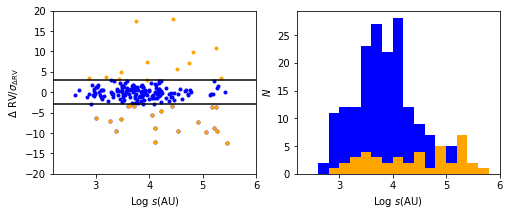

In [150]:
fig, ax = plt.subplots(1, 2, figsize=(8,3))

idx_cat = power_law['P_posterior'][idx_power_law] > 0.99


# RV difference
delta_RV = RAVE['HRV'][idx_power_law_1][idx_cat] - RAVE['HRV'][idx_power_law_2][idx_cat]
delta_RV_err = np.sqrt(RAVE['eHRV'][idx_power_law_1][idx_cat]**2 + RAVE['eHRV'][idx_power_law_2][idx_cat]**2)
delta_RV_sigma = (RAVE['HRV'][idx_power_law_1][idx_cat] - RAVE['HRV'][idx_power_law_2][idx_cat]) / delta_RV_err
proj_sep = power_law['proj_sep'][idx_power_law][idx_cat]

idx_in_3sigma = delta_RV_sigma < 3.0
idx_out_3sigma = abs(delta_RV_sigma) >= 3.0


ax[0].scatter(np.log10(proj_sep[idx_in_3sigma]), delta_RV_sigma[idx_in_3sigma], marker='.', color='b')
ax[0].scatter(np.log10(proj_sep[idx_out_3sigma]), delta_RV_sigma[idx_out_3sigma], marker='.', color='orange')

ax[0].axhline(-3.0, color='k')
ax[0].axhline(3.0, color='k')

ax[0].set_xlim(2.2,6)
ax[0].set_ylim(-20,20)

ax[0].set_xlabel(r"${\rm Log}\ s ({\rm AU})$")
ax[0].set_ylabel(r"$\Delta\ {\rm RV} / \sigma_{\Delta {\rm RV}}$")



# Histograms
bins = np.linspace(2.2, 6.0, 20)

ax[1].hist(np.log10(proj_sep[idx_in_3sigma]), bins=bins, color='b')
ax[1].hist(np.log10(proj_sep[idx_out_3sigma]), bins=bins, color='orange')

ax[1].set_xlim(2.2,6)

ax[1].set_xlabel(r"${\rm Log}\ s ({\rm AU})$")
ax[1].set_ylabel(r"$N$")

plt.savefig("../figures/RAVE_compare.pdf")

plt.show()

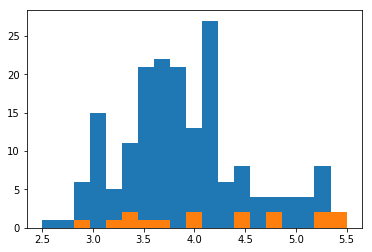

In [138]:

bins = np.linspace(2.5, 5.5, 20)

plt.hist(np.log10(proj_sep[idx_in_3sigma]), bins=bins)
plt.hist(np.log10(proj_sep[idx_out_3sigma]), bins=bins)

plt.show()

In [139]:
print(len(proj_sep[idx_in_3sigma]))
print(len(proj_sep[idx_out_3sigma]))

184
16


In [140]:
idx_same = np.where(RAVE['HRV'][idx_power_law_1][idx_cat] == RAVE['HRV'][idx_power_law_2][idx_cat])[0]

print(RAVE['Source'][idx_power_law_1][idx_cat][idx_same] - RAVE['Source'][idx_power_law_2][idx_cat][idx_same])

[]
